In [28]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import yaml

from analysis.metrics import empirical_return_period, corr_truth_train_model
from analysis.plot_config import params, contourLevels, colormap


root_emulator_dir = '/home/exouser/Documents/karan/2DTurbDiffusion_cnditional/results/cond0_step3_prev2_2500/'
run_num = 1 # For Conditonal DM
analysis_dir_truth = '/home/exouser/Documents/karan/2DTurbDiffusion_cnditional/results/test_UDM/analysis/truth/'
analysis_dir_train = '/home/exouser/Documents/karan/2DTurbDiffusion_cnditional/results/test_UDM/analysis/train/'


yaml_files = glob.glob(os.path.join(root_emulator_dir, "*.yaml"))
# Load the first .yaml file found
with open(yaml_files[0], 'r') as f:
    emulator_config = yaml.safe_load(f)
diffusion_config = emulator_config['diffusion_params']
model_config = emulator_config['model_params']

if diffusion_config['conditional']:
    analysis_dir_emulator = os.path.join(root_emulator_dir, "analysis", "emulator", str(run_num))
    plt_save_dir = os.path.join(root_emulator_dir, "figures", str(run_num))
else:
    analysis_dir_emulator = os.path.join(root_emulator_dir, "analysis", "emulator")
    plt_save_dir = os.path.join(root_emulator_dir, "figures")
os.makedirs(plt_save_dir, exist_ok=True)


analysis_dir_arr = [analysis_dir_truth, analysis_dir_train , analysis_dir_emulator]  

label = [r"Truth", r"Train", r"UDM"]
colors_markers = ['-k', '--r', '-.b']
color=['k', 'r', 'b']

Lx, Ly = 2*np.pi, 2*np.pi
Nx, Ny = model_config['im_size'], model_config['im_size']


# Spectra

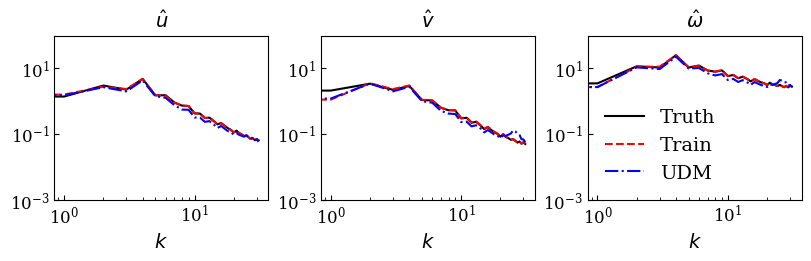

<Figure size 640x480 with 0 Axes>

In [29]:
################### Spectra ###################

fig, axes = plt.subplots(1,3,figsize=(8, 2.5), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/spectra.npz")

    # U_spectra = data['spectra_U_zonal_avg']
    # V_spectra = data['spectra_V_zonal_avg']
    # Omega_spectra = data['spectra_Omega_zonal_avg']
    # wavenumbers = data['wavenumber_zonal_avg']

    U_spectra = data['spectra_U_angular_avg']
    V_spectra = data['spectra_V_angular_avg']
    Omega_spectra = data['spectra_Omega_angular_avg']
    wavenumbers = data['wavenumber_angular_avg']

    axes[0].loglog(wavenumbers[:-1], U_spectra[:-1], colors_markers[i], label=label[i])
    axes[1].loglog(wavenumbers[:-1], V_spectra[:-1], colors_markers[i], label=label[i])
    axes[2].loglog(wavenumbers[:-1], Omega_spectra[:-1], colors_markers[i], label=label[i])


for ax in axes.flatten():
    ax.set_xlabel('$k$')
    ax.set_ylim([1e-3, 1e2])

axes[0].set_title('$\hat{u}$', rotation=0)
axes[1].set_title('$\hat{v}$', rotation=0)
axes[2].set_title('$\hat{\omega}$', rotation=0)

axes[2].legend(frameon=False)
plt.show()
plt.savefig(plt_save_dir + '/spectra.png', dpi=600, bbox_inches='tight')


# Zonal Mean

Zonal Mean
Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)
Corr U     : (np.float32(0.93), np.float32(0.75), np.float32(0.7))
Corr Omega : (np.float32(0.98), np.float32(0.82), np.float32(0.81))


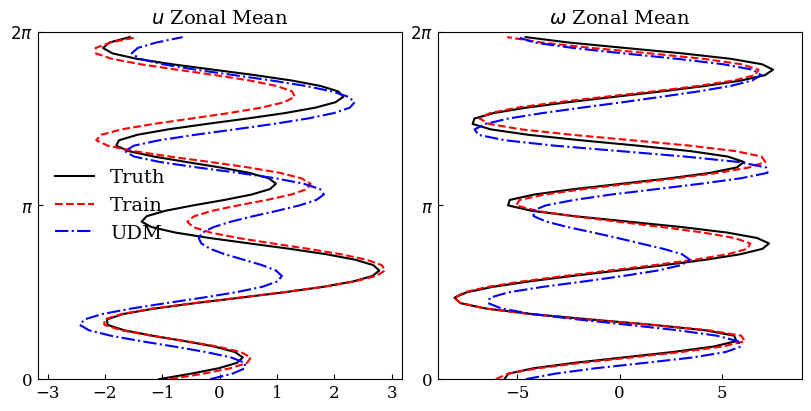

In [30]:
################### Zonal Mean ###################

fig, axes = plt.subplots(1,2,figsize=(8, 4), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)

dx = Lx/Nx
y = np.linspace(0,2*np.pi-dx,Nx)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/zonal_mean.npz")

    U_mean_zonal = data['U_zonal_mean']
    Omega_mean_zonal = data['Omega_zonal_mean']

    axes[0].plot(U_mean_zonal, y, colors_markers[i], label=label[i])
    axes[1].plot(Omega_mean_zonal, y, colors_markers[i], label=label[i])

    if analysis_dir == analysis_dir_truth:

        U_zonal_mean_truth = U_mean_zonal
        Omega_zonal_mean_truth = Omega_mean_zonal

    elif analysis_dir == analysis_dir_train:
        U_zonal_mean_train = U_mean_zonal
        Omega_zonal_mean_train = Omega_mean_zonal

    elif analysis_dir == analysis_dir_emulator:
        U_zonal_mean_emulator = U_mean_zonal
        Omega_zonal_mean_emulator = Omega_mean_zonal

axes[0].set_title(r'$u$ Zonal Mean')
axes[1].set_title(r'$\omega$ Zonal Mean')

for ax in axes.flatten():
    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    ax.set_ylim([0, 2*np.pi])

U_mean_zonal_max = np.max(np.abs([U_zonal_mean_truth, U_zonal_mean_train, U_zonal_mean_emulator]))
Omega_mean_zonal_max = np.max(np.abs([Omega_zonal_mean_truth, Omega_zonal_mean_train, Omega_zonal_mean_emulator]))

axes[0].set_xlim([-1.1*U_mean_zonal_max, 1.1*U_mean_zonal_max])
axes[1].set_xlim([-1.1*Omega_mean_zonal_max, 1.1*Omega_mean_zonal_max])

axes[0].legend(frameon=False)
fig.savefig(plt_save_dir + '/zonal_mean.png', dpi=600, bbox_inches='tight')

print('Zonal Mean')
print('Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)')
print('Corr U     :', corr_truth_train_model(U_zonal_mean_truth, U_zonal_mean_train, U_zonal_mean_emulator))
print('Corr Omega :', corr_truth_train_model(Omega_zonal_mean_truth, Omega_zonal_mean_train, Omega_zonal_mean_emulator))



# Temporal Mean

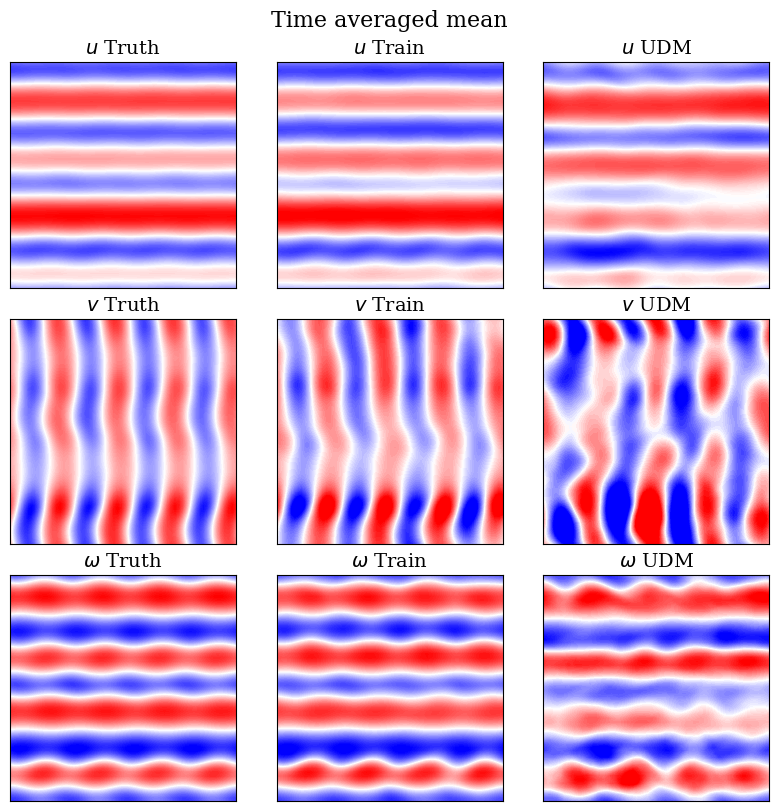

In [31]:
################### Sample Mean ###################


fig, axes = plt.subplots(3, 3, figsize=(8, 8), layout='constrained')
plt.rcParams.update(params)


for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/temporal_mean.npz")
    # data = np.load(analysis_dir_truth + "/temporal_mean.npz")

    U_mean_sample = data['U_sample_mean']
    V_mean_sample = data['V_sample_mean']
    Omega_mean_sample = data['Omega_sample_mean']

    if i == 0:
        vmax_U = np.max(U_mean_sample)
        vmax_V = np.max(V_mean_sample)
        vmax_Omega = np.max(Omega_mean_sample)

    axes[0,i].contourf(U_mean_sample, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
    axes[1,i].contourf(V_mean_sample, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
    axes[2,i].contourf(Omega_mean_sample, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)

    axes[0,i].set_title(rf"$u$ {label[i]}")
    axes[1,i].set_title(rf"$v$ {label[i]}")
    axes[2,i].set_title(rf"$\omega$ {label[i]}")

# Set aspect ratio to equal and remove labels for all axes
for ax in axes.flat:
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle(r'Time averaged mean')

plt.savefig(plt_save_dir + '/temporal_mean.png', dpi=600, bbox_inches='tight')


# Temporal Mean - Diff

Sample Mean Correlations
Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)
Corr U     : (np.float64(0.93), np.float64(0.74), np.float64(0.69))
Corr Omega : (np.float64(0.98), np.float64(0.8), np.float64(0.79))
Corr V     : (np.float64(0.93), np.float64(0.7), np.float64(0.64))


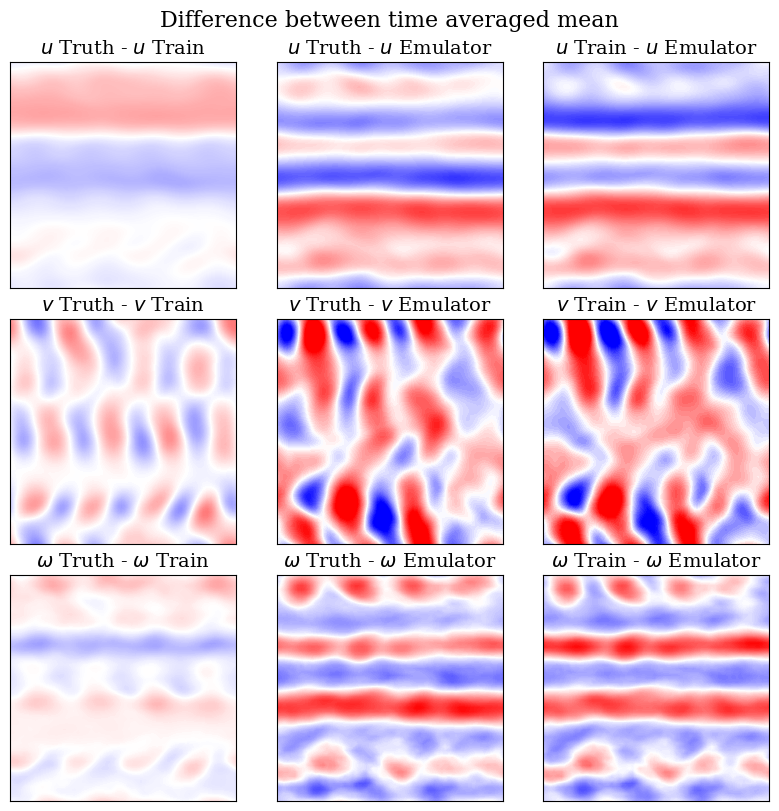

In [32]:
################### Sample Mean Difference ###################


for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/temporal_mean.npz")
    # data = np.load(analysis_dir_truth + "/temporal_mean.npz")

    if analysis_dir == analysis_dir_truth:

        U_mean_sample_truth = data['U_sample_mean']
        V_mean_sample_truth = data['V_sample_mean']
        Omega_mean_sample_truth = data['Omega_sample_mean']

    elif analysis_dir == analysis_dir_train:

        U_mean_sample_train = data['U_sample_mean']
        V_mean_sample_train = data['V_sample_mean']
        Omega_mean_sample_train = data['Omega_sample_mean']

    elif analysis_dir == analysis_dir_emulator:

        U_mean_sample_emulator = data['U_sample_mean']
        V_mean_sample_emulator = data['V_sample_mean']
        Omega_mean_sample_emulator = data['Omega_sample_mean']

    # if i == 0:
vmax_U = np.max(U_mean_sample_truth)
vmax_V = np.max(V_mean_sample_truth)
vmax_Omega = np.max(Omega_mean_sample_truth)

fig, axes = plt.subplots(3, 3, figsize=(8, 8), layout='constrained')
plt.rcParams.update(params)


axes[0,0].contourf(U_mean_sample_truth-U_mean_sample_train, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[1,0].contourf(V_mean_sample_truth-V_mean_sample_train, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[2,0].contourf(Omega_mean_sample_truth-Omega_mean_sample_train, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)

axes[0,1].contourf(U_mean_sample_truth-U_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[1,1].contourf(V_mean_sample_truth-V_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[2,1].contourf(Omega_mean_sample_truth-Omega_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)

axes[0,2].contourf(U_mean_sample_train-U_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_U, vmin=-vmax_U)
axes[1,2].contourf(V_mean_sample_train-V_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_V, vmin=-vmax_V)
axes[2,2].contourf(Omega_mean_sample_train-Omega_mean_sample_emulator, levels=contourLevels, cmap=colormap, vmax=vmax_Omega, vmin=-vmax_Omega)


fig.suptitle(r'Difference between time averaged mean')
axes[0,0].set_title(r'$u$ Truth - $u$ Train')
axes[0,1].set_title(r'$u$ Truth - $u$ Emulator')
axes[0,2].set_title(r'$u$ Train - $u$ Emulator')

axes[1,0].set_title(r'$v$ Truth - $v$ Train')
axes[1,1].set_title(r'$v$ Truth - $v$ Emulator')
axes[1,2].set_title(r'$v$ Train - $v$ Emulator')

axes[2,0].set_title(r'$\omega$ Truth - $\omega$ Train')
axes[2,1].set_title(r'$\omega$ Truth - $\omega$ Emulator')
axes[2,2].set_title(r'$\omega$ Train - $\omega$ Emulator')

for ax in axes.flatten():
    ax.set_aspect('equal', 'box')
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(plt_save_dir + '/temporal_mean_diff.png', dpi=600, bbox_inches='tight')

print('Sample Mean Correlations')
print('Correlation: (Truth, Train), (Truth, Emulator), (Train, Emulator)')
print('Corr U     :', corr_truth_train_model(U_mean_sample_truth, U_mean_sample_train, U_mean_sample_emulator))
print('Corr Omega :', corr_truth_train_model(Omega_mean_sample_truth, Omega_mean_sample_train, Omega_mean_sample_emulator))
print('Corr V     :', corr_truth_train_model(V_mean_sample_truth, V_mean_sample_train, V_mean_sample_emulator))


# EOF

EOF_U.shape: (64, 3)
EOF_U.shape: (64, 3)
EOF_U.shape: (64, 3)


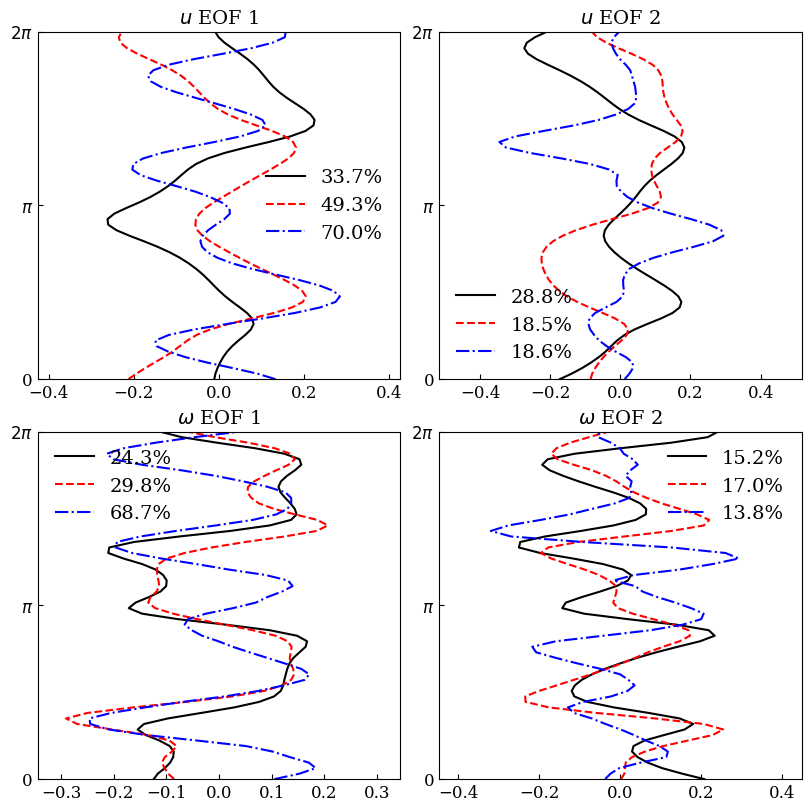

In [33]:
################### EOF ###################

fig, axes = plt.subplots(2,2,figsize=(8, 8), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)


for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)

    EOF_U = data["U_eofs"]
    if EOF_U.shape[0] != Ny:
        EOF_U = EOF_U.T
    exp_var_U = data["U_expvar"] # percent
    print(f'EOF_U.shape: {EOF_U.shape}')

    EOF_Omega = data["Omega_eofs"]
    if EOF_Omega.shape[0] != Ny:
        EOF_Omega = EOF_Omega.T
    EOF_Omega = data["Omega_eofs"]
    exp_var_Omega = data["Omega_expvar"] # percent

    exp_var_U = 100*np.round(exp_var_U, 3)
    exp_var_Omega = 100*np.round(exp_var_Omega, 3)

    y = np.linspace(0, Lx, Ny)

    for count in range(2):
        axes[0, count].plot(EOF_U[:,count], y, colors_markers[i], label=f'{exp_var_U[count]:.1f}%')
        axes[1, count].plot(EOF_Omega[:,count], y, colors_markers[i], label=f'{exp_var_Omega[count]:.1f}%')

for ax in axes.flatten():
    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', r'$\pi$', r'$2\pi$'])
    ax.set_ylim([0, 2*np.pi])


for count in range(2):
    axes[0,count].set_title(rf'$u$ EOF {count+1}')
    axes[1,count].set_title(rf'$\omega$ EOF {count+1}')

    EOF_max = np.max(np.abs([EOF_U[:,count]]))
    axes[0, count].set_xlim([-1.5*EOF_max, 1.5*EOF_max])
    axes[0,count].legend(frameon=False)

    EOF_max = np.max(np.abs([EOF_Omega[:,count]]))
    axes[1, count].set_xlim([-1.4*EOF_max, 1.4*EOF_max])
    axes[1,count].legend(frameon=False)

plt.show()
fig.savefig(plt_save_dir + '/zonal_EOFs.png', dpi=600, bbox_inches='tight')


## PC Autocorr

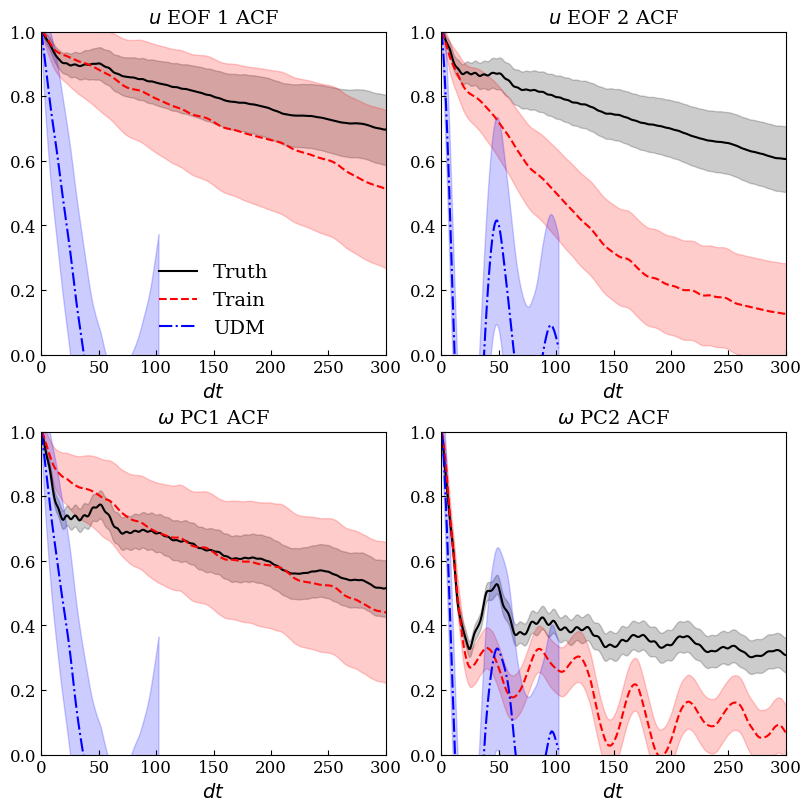

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8), layout='constrained')
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/zonal_eof_pc.npz", allow_pickle=True)

    PC_acf_U = data["U_pc_acf"]
    PC_acf_Omega = data["Omega_pc_acf"]

    for count in range(2):

        acf_U = PC_acf_U[count]
        acf_Omega = PC_acf_Omega[count]

        acf_U = PC_acf_U[count]
        acf_Omega = PC_acf_Omega[count]

        # Training data and emulation data are saved at different time steps
        if analysis_dir == analysis_dir_emulator:
            time = np.linspace(0, acf_U['acf'].shape[0], acf_U['acf'].shape[0])
        else:
            time = np.linspace(0, acf_U['acf'].shape[0], acf_U['acf'].shape[0])

        axes[0, count].plot(time, acf_U['acf'], colors_markers[i], label=label[i])
        axes[0, count].fill_between(time, acf_U['confint'][:,0], acf_U['confint'][:,1], color=color[i], alpha=0.2)

        axes[1,count].plot(time, acf_Omega['acf'], colors_markers[i], label=label[i])
        axes[1,count].fill_between(time, acf_Omega['confint'][:,0], acf_Omega['confint'][:,1], color=color[i], alpha=0.2)
        
        axes[0, count].set_title(rf'$u$ EOF {count+1} ACF')
        axes[1,count].set_title(rf'$\omega$ PC{count+1} ACF')

    axes[0,0].legend(frameon=False)


for ax in axes.flatten():
    ax.set_xlabel('$dt$')
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 300])

#axes[1,0].legend(frameon=False)

    # axes[0,0].legend()
    # axes[1,0].legend()

plt.savefig(plt_save_dir + '/zonal_EOFs.png', dpi=600, bbox_inches='tight')


# Divergence

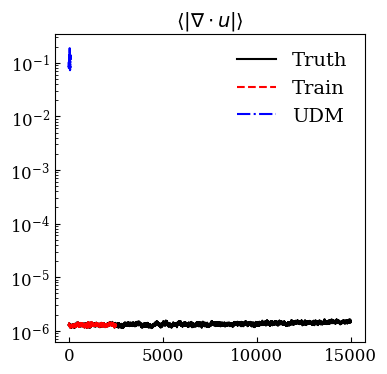

In [35]:
fig, axes = plt.subplots(1, figsize=(4, 4))
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data = np.load(analysis_dir + "/div.npz")
    div = data['div']

    axes.semilogy(div, colors_markers[i], label=label[i])


axes.set_title(r'$ \langle |\nabla \cdot u |\rangle$')
axes.legend(frameon=False)

plt.savefig(plt_save_dir + '/div.png', dpi=600, bbox_inches='tight')


# PDF

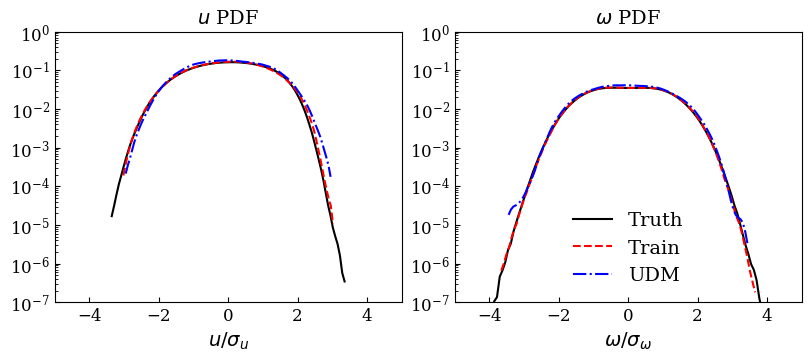

In [36]:
fig, axes = plt.subplots(1,2,figsize=(8, 3.5), layout="compressed")  # Adjust figure size as needed
plt.rcParams.update(params)

for i, analysis_dir in enumerate(analysis_dir_arr):

    data_U = np.load(analysis_dir + "/PDF_U.npz")
    data_Omega = np.load(analysis_dir + "/PDF_Omega.npz")

    U_pdf = data_U['U_pdf']
    U_bins = data_U['U_bins']
    U_std = data_U['U_std']
    Omega_pdf = data_Omega['Omega_pdf']
    Omega_bins = data_Omega['Omega_bins']
    Omega_std = data_Omega['Omega_std']

    axes[0].semilogy(U_bins/U_std, U_pdf, colors_markers[i], label=label[i])
    axes[1].semilogy(Omega_bins/Omega_std, Omega_pdf, colors_markers[i], label=label[i])

axes[0].set_title(r'$u$ PDF')
axes[1].set_title(r'$\omega$ PDF')

plt.legend(frameon=False)

for ax in axes.flatten():
    ax.set_xlabel('$k$')
    ax.set_ylim([1e-7, 1])
    ax.set_xlim([-5, 5])

axes[0].set_xlabel(r'$u/\sigma_u$')
axes[1].set_xlabel(r'$\omega/\sigma_{\omega}$')

plt.legend(frameon=False)

plt.savefig(plt_save_dir + '/pdf.png', dpi=600, bbox_inches='tight')